<a href="https://colab.research.google.com/github/restrepo/Calculus/blob/master/Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


__IMPORTANT TIP__: To proper see the mathematical formulas open in Colab with the button in the first cell

## Integration
From the approximate equation for $\Delta x=x_{i+1}-x_i$
$$f'(x_i)\approx \frac{f(x_{i+1})-f(x_i)}{\Delta x}\,,$$
we have that
$$f(x_{i+1})\approx f(x_i)+f'(x_i)\Delta x\,.\qquad\qquad (1)$$

We can use this equation to find $f(x)$ step by step.

We start from the initial conditions $(x_0,f(x_0))$ and some small step $\Delta x$, e.g, $\Delta x=0.1$. 

* The first step for $i=0$, allow us to get $f(x_1)$ with some precision determined by the chosen $\Delta x$  
\begin{align}
f(x_1)\approx& f(x_0)+f'(x_0)\Delta x\\
x_1=&x_0+\Delta x\\
\end{align}
* For $i=1$
\begin{align}
f(x_2)\approx& f(x_1)+f'(x_1)\Delta x\\
x_2=&x_1+\Delta x\\
\end{align}
* ...
* After $i$ steps
\begin{align}
f(x_{i+1})\approx& f(x_i)+f'(x_i)\Delta x\\
x_{i+1}=&x_i+\Delta x\\
\end{align}

This procedure is implemented in the following algorithm

In [0]:
# Derivative of the function to be found
def fp(x):
    return -2*x+8
# Initial conditions
x0=0
y0=84
# Small enough step
Δx=0.01
# final point
xf=10
# Initial lists
x=[x0]
y=[y0]
# Number of steps to reach `xf`
imax=int( (xf-x0)/Δx )
# Implementation of iterative loop for eq. (1)
for i in range(imax):
    y.append( y[-1] +  fp(x[-1])*Δx )
    x.append( x[-1] + Δx )

Text(0, 0.5, '$f(x)$')

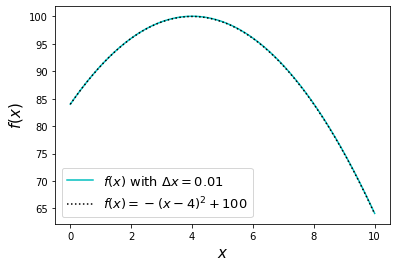

In [0]:
# For testing purposes
def f(x):
    if isinstance(x,list):
        x=np.array(x)
    return -(x-4)**2+100
# Result
plt.plot(x,y,'c-',label='$f(x)$ with $\Delta x=0.01$')
plt.plot(x,f(x),'k:',label='$f(x)=-(x-4)^2+100$')
plt.legend(loc='best',fontsize=13)
plt.xlabel('$x$',size=15)
plt.ylabel('$f(x)$',size=15)

## Numerical analysis
We now implement the algorithm as an integrate function, in order to further analize the details of the procedure

In [0]:
def integrate(fp,x0,y0,xf,Δx=0.1):
    '''
    Obtain the solution to the differential equation
    f'(x)=fp(x) between x0 and xf, with initial conditions:
      x0, and y0=f(x0)
    where f(x) is the solution, and with step
    Δx (Default to 0.1)
    '''
    x=[x0]
    y=[y0]
    imax=int( (xf-x0)/Δx )
    for i in range(imax):
        y.append( y[-1] +  fp(x[-1])*Δx )
        x.append( x[-1] + Δx )
    return x,y

Let us check first the effect of the precision in $\Delta x$

Text(0, 0.5, '$f(x)$')

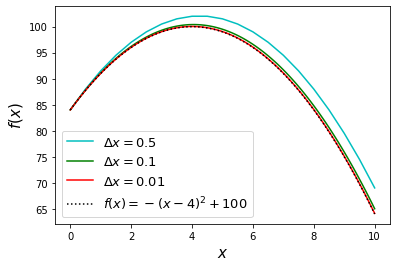

In [0]:
Δx=0.5
x,y=integrate(lambda x:-2*x+8, x0=0, y0=84, xf=10, Δx=Δx )
plt.plot(x,y,'c-',label='$\Delta x={}$'.format(Δx))
Δx=0.1
x,y=integrate(lambda x:-2*x+8, x0=0, y0=84, xf=10, Δx=Δx )
plt.plot(x,y,'g-',label='$\Delta x={}$'.format(Δx))
Δx=0.01
x,y=integrate(lambda x:-2*x+8, x0=0, y0=84, xf=10, Δx=Δx )
plt.plot(x,y,'r-',label='$\Delta x={}$'.format(Δx))
plt.plot(x,f(x),'k:',label='$f(x)=-(x-4)^2+100$')
plt.legend(loc='best',fontsize=13)
plt.xlabel('$x$',size=15)
plt.ylabel('$f(x)$',size=15)

Now we check the effect of the initial conditions

Text(0.5, 0, '$x$')

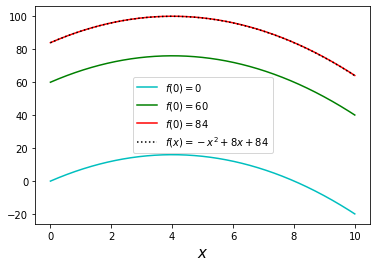

In [0]:
Δx=0.01
y0=0
x0=0
x,y=integrate(lambda x:-2*x+8, x0=x0, y0=y0, xf=10, Δx=Δx )
plt.plot(x,y,'c-',label='$f({})={}$'.format(x0,y0))
y0=60
x,y=integrate(lambda x:-2*x+8, x0=x0, y0=y0, xf=10, Δx=Δx )
plt.plot(x,y,'g-',label='$f({})={}$'.format(x0,y0))
y0=84
x,y=integrate(lambda x:-2*x+8, x0=x0, y0=y0, xf=10, Δx=Δx )
plt.plot(x,y,'r-',label='$f({})={}$'.format(x0,y0))
plt.plot(x,f(x),'k:',label='$f(x)=-x^2+8x+84$')
plt.legend(loc='best',fontsize=10)
plt.xlabel('$x$',size=15)
#plt.ylabel('$f(x)$',size=15)

The integration give us the function from which the derivative was obtained until a constant factor to be determined from the initial condition of the function itself:
$$f(x)=-x^2+8x+c\,.$$
For the initial condition $(x_0,f(x_0))=(0,84)$, we get $c=84$.

We denote the generic iterative procedure to obtain $f(x)$ from $f'(x)$ as the _indefinite integral_ of $f'(x)$
We use the notation
$$ f(x)=\int f'(x) \,\operatorname{d}x\,.\qquad\qquad (2)$$

In this way
$$ -x^2+8x+c=\int (-2x+8) \,\operatorname{d}x\,.$$

## Analytical integration
For some generic function $f(x)$, we can write eq. (2) as the _integral_ of $f(x)$:
$$ F(x)=\int f(x) \,\operatorname{d}x\,.$$
such that
$$ F'(x)=f(x)\,.$$ 
In this way $F(x)$ is called the _antiderivative_ of $f(x)$. Note that if $F(x)$ is the antiderivative of $f(x)$, $G(x)=F(x)+c$,where $c$ is a constant, is also one  antiderivative of $f(x)$.

### Example
Solve 
$$ \int x^n \,\operatorname{d}x\,.$$
We need to find $F(x)$ such that 
$$F'(x)=x^n$$. 
By using the derivative of a polynomial it is straightforward to check that 
$$F(x)=\frac{x^{n+1}}{n+1}+c\,,\qquad \text{$c$ is a constant}$$
is the required solution. In fact
$$F'(x)=\frac{n+1}{n+1}x^{n+1-1}=x^n$$
Then
$$\int x^n \,\operatorname{d}x=\frac{x^{n+1}}{n+1}+c\,,\qquad\qquad (3)$$


## Properties
Because the integral is just the inverse of the derivative, a similar set of properties hold:
$$\int a f(x)\operatorname{d}x=a \int f(x)\operatorname{d}x$$
$$\int [f(x)+g(x)]\operatorname{d}x=\int f(x)\operatorname{d}x+\int g(x)\operatorname{d}x$$

## Example
Solve 
$$\int(-2x+8)\operatorname{d}x$$
By using eq. (3)
\begin{align}
\int(-2x+8)\operatorname{d}x
=&\int(-2x)\operatorname{d}x+\int 8 \operatorname{d}x\\
=&-2\int x\operatorname{d}x+8\int x^0 \operatorname{d}x\\
=&-2 \frac{x^2}{2}+8x+c\\
=&-x^2+8x+c\,,
\end{align}

## Proper integral
Combining the results for the function:
$$f'(x)=-2x+8\,.$$
we have from eq (2) and (3)
$$ f(x)=\int f'(x) \,\operatorname{d}x=-x^2+8x+c$$

If we assume that for some $x_0$ we know $f(x_0)$, then 
$$f(x_0)=-x_0^2+8x_0+c\,$$
allow us to find
$$c=f(x_0)-(-x_0^2+8x_0)\,.$$
Therefore
\begin{align}
 f(x)=&-x^2+8x+f(x_0)-(-x_0^2+8x_0)\\
 f(x)-f(x_0)=&-x^2+8x-(-x_0^2+8x_0)\\
f(x)-f(x_0)=&-(x^2-x_0^2)+8(x-x_0)\,.
\end{align}
Therefore, we can define the proper integral of $f'(x)$ between $x_0$ and $x$ as
$$\int_{x_0}^x f'(x)\operatorname{d}x=f(x)\Big|_{x_0}^x=f(x)-f(x_0)$$
so that
\begin{align}
\int_{x_0}^x f'(x)\operatorname{d}x=&\int_{x_0}^x (-2x+8) \operatorname{d}x\\
\int_{x_0}^x f'(x)\operatorname{d}x=&-\int_{x_0}^x 2x \operatorname{d}x+\int_{x_0}^x 8 \operatorname{d}x \\
f(x)\Big|_{x_0}^x=&- 2\frac{x^2}{2}\Big|_{x_0}^x+8x \Big|_{x_0}^x \\
f(x)-f(x_0)=&- (x^2-x_0^2)+8(x -x_0) \,.
\end{align}



## Example
In the free fall, $\boldsymbol{F}=-mg \boldsymbol{i} $. Since $\boldsymbol{F}=m\boldsymbol{a}$, and $a=v'(t)$, we have for the movement in the direction $\boldsymbol{i}$
\begin{align}
v'(t)=&-g\,.
\end{align}
By making the proper integration in both sides ($g=\text{cte}$), and using $v_0=v(t_0)$, we have
### For $t_0=0$
\begin{align}
\int_{0}^t v'(t)\operatorname{d}t=&-\int_{0}^t g \operatorname{d}t\\
 v(t)\Big|_{0}^t=&-g t \Big|_{0}^t\\
 v(t)-v(0)=&-gt\\
v(t)-v_0=&-gt\,,
\end{align}
and
$$v(t)=v_0-gt$$
Since $v(t)=x'(t)$
\begin{align}
x'(t)=&v_0-gt\\
\int_{0}^t x'(t) dt=&\int_{0}^t( v_0-gt)dt\\
x(t)\Big|_0^t=&v_0\int_0^t dt-g\int_0^t t dt \\
x(t)=&x_0+v_0 t+\frac{g}{2}t^2
\end{align}

### For any other intial point $t_0$
$$v(t)=v_0-g(t-t_0)\qquad (4)$$
\begin{align}
\int_{t_0}^t v'(t)\operatorname{d}t=&-\int_{t_0}^t g \operatorname{d}t\\
 v(t)\Big|_{t_0}^t=&-g t \Big|_{t_0}^t\\
 v(t)-v(t_0)=&-g(t-t_0)\\
v(t)-v_0=&-g(t-t_0)\,,
\end{align}
or
$$v(t)=v_0-g(t-t_0)\qquad (4)$$

\begin{align}
x'(t)=&v_0-g(t-t_0)\\
\int_{t_0}^t x'(t) dt=&\int_{t_0}^t[ v_0-g(t-t_0)]dt\\
x(t)-x(0)=&v_0\int_{t_0}^t dt-g\int_{t_0}^t(t-t_0) dt\\
x(t)-x(0)=&v_0\int_{t_0}^t dt-g\int_{t_0}^t t dt+gt_0\int_{t_0}^t dt\\
x(t)-x(0)=&v_0t\Big|_{t_0}^t -g\frac{t^2}{2}\Big|_{t_0}^t-gt_0 t\Big|_{t_0}^t\\
x(t)-x(0)=&v_0(t-t_0) -\frac{g}{2}(t^2-t_0^2)+gt_0 (t-t_0)\\
x(t)-x(0)=&v_0(t-t_0) -\frac{g}{2}( t^2 -t_0^2-2t_0t +2t_0^2)\\
x(t)-x(0)=&v_0(t-t_0) -\frac{g}{2}( t^2 +t_0^2-2t_0t)\\
x(t)-x_0=&v_0(t-t_0) -\frac{g}{2}( t-t_0)^2\\
x(t)=&x_0+v_0(t-t_0) -\frac{g}{2}( t-t_0)^2\\
\end{align}
